degree bias variance
1 [31.09908996] 0.1816681989493013
2 [6.08622233] 0.041155827218160135
3 [5.49808738] 0.044864768112283876
4 [3.1778121] 0.03380625183881615
5 [3.08885099] 0.031103769602306344
6 [2.72315791] 0.029209678135151414
7 [2.50849239] 0.03945440964820947
8 [2.5046076] 0.05968901697108015
9 [2.49685944] 0.06612185111353347


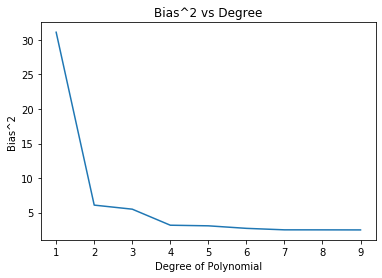

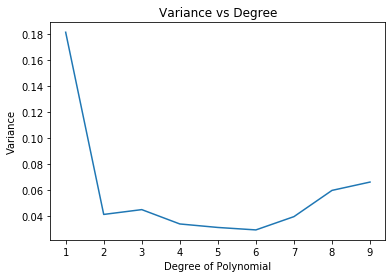

In [3]:
import numpy as np 
import pickle
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from matplotlib import pyplot as plt 

def bias(exp_values,y_test):
	ans=0.00
	for i in range(len(y_test)):
		temp=(y_test[i]-np.mean(exp_values[:,i]))
		temp*=temp
		ans+=temp
	ans/=len(y_test)
	return ans 

def variance(exp_values,y_test):
	ans=0.0
	for i in range(500):
		# print(exp_values[i].shape)
		ans+=(np.var(exp_values[:,i]))
	ans/=500
	return ans
	

def main():
	datafile = open('./Q1_data/data.pkl',"rb");
	dataset = pickle.load(datafile)
	x=dataset[:,:-1]
	y=dataset[:,-1]
	y_dum=len(y)
	# print(y_dum)
	y=y.reshape(y_dum,1)
	x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=0)
	sz1=len(x_train)
	sz2=sz1/10
	sz2=int(sz2)
	x_test=x_test.reshape(len(x_test),1)
	x_train=x_train.reshape(len(x_train),1)
	y_test=y_test.reshape(len(y_test),1)
	y_train=y_train.reshape(len(y_train),1)
	x_train_subs=np.empty(shape=(10,sz2,1))
	y_train_subs=np.empty(shape=(10,sz2,1))
	for i in range(9):
		if(i==0):
		    y1=y_train
		    x12=x_train
		sz3=sz2/sz1
		# print(sz3,sz1)
		x22,x_train_subs[i],y2,y_train_subs[i]=train_test_split(x12,y1,test_size=sz3,random_state=0)
		sz1-=sz2
		y1=y2
		x12=x22
		# print(x12.shape,y1.shape)
	# print(x12.shape,y1.shape)
	# print(x12)
	x_train_subs[9]=x12
	y_train_subs[9]=y1
	reg=LinearRegression()
	bias_ar=np.empty(shape=(9,1))
	var_ar=np.empty(shape=(9,1))
	deg=np.empty(shape=(9,1))
	print("degree bias variance")
	for i in range(1,10):
		deg[i-1]=i
		print(i,end=" ")
		exp_values=np.empty(shape=(10,len(x_test),1))
		if(i>1):
			poly_fet = PolynomialFeatures(degree=i)
		for i1 in range(10):
			if(i==1):
				x_poly=x_train_subs[i1]
				x_tst=x_test
			else:
				x_poly=poly_fet.fit_transform(x_train_subs[i1])
				x_tst=poly_fet.fit_transform(x_test)
			reg.fit(x_poly,y_train_subs[i1])
			# print(reg.coef_)
			exp_values[i1]=reg.predict(x_tst)

		mean_bias_sq=bias(exp_values,y_test)
		mean_variance=variance(exp_values,y_test)
		bias_ar[i-1]=mean_bias_sq
		var_ar[i-1]=mean_variance
		print(mean_bias_sq,mean_variance)

	plt.plot(deg,bias_ar)
	plt.title("Bias^2 vs Degree")
	plt.xlabel("Degree of Polynomial")
	plt.ylabel("Bias^2")
	plt.show()

	plt.plot(deg,var_ar)
	plt.title("Variance vs Degree")
	plt.xlabel("Degree of Polynomial")
	plt.ylabel("Variance")
	plt.show()
	# plt.title("Bias")



if __name__ == '__main__':
	main()

degree bias variance
1 [999228.39687192] 70545.48914575031
2 [954619.27379443] 125870.85554877373
3 [9389.73011679] 150073.73954647878
4 [10907.34813404] 212235.70832550066
5 [9339.19428314] 276388.4801836639
6 [10248.58639799] 316863.4977355021
7 [10335.27944111] 357511.1034778219
8 [10149.4951806] 404289.17476527527
9 [10715.80790547] 459113.9355044089


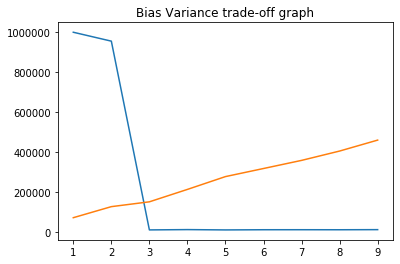

In [4]:
import numpy as np 
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from matplotlib import pyplot as plt 

def bias(exp_values,y_test):
	ans=0.00
	for i in range(len(y_test)):
		temp=(y_test[i]-np.mean(exp_values[:,i]))
		temp*=temp
		ans+=temp
	ans/=len(y_test)
	return ans 

def variance(exp_values,y_test):
	ans=0.0
	for i in range(len(y_test)):
		# print(exp_values[i].shape)
		ans+=(np.var(exp_values[:,i]))
	ans/=len(y_test)
	return ans
	

def main():
	datax_train = open('./Q2_data/X_train.pkl',"rb");
	datay_train = open('./Q2_data/Y_train.pkl',"rb");
	datax_test = open('./Q2_data/X_test.pkl',"rb");
	datay_test = open('./Q2_data/Fx_test.pkl',"rb");
	
	x_train=pickle.load(datax_train)
	x_test = pickle.load(datax_test)
	x_test=x_test.reshape(len(x_test),1)
	y_train=pickle.load(datay_train)
	y_test=pickle.load(datay_test)
	y_test=y_test.reshape(len(y_test),1)

	reg=LinearRegression()
	bias_ar=np.empty(shape=(9,1))
	var_ar=np.empty(shape=(9,1))
	deg=np.empty(shape=(9,1))
	print("degree bias variance")
	samples=len(x_train[:,0])
	# print(samples)
	for i in range(1,10):
		deg[i-1]=i
		print(i,end=" ")
		exp_values=np.empty(shape=(samples,len(x_test),1))
		if(i>1):
			poly_fet = PolynomialFeatures(degree=i)
		for i1 in range(20):
			y1=y_train[i1].reshape(len(y_train[i1]),1)
			x1=x_train[i1].reshape(len(x_train[i1]),1)
			if(i==1):
				x_poly=x1
				x_tst=x_test
			else:
				x_poly=poly_fet.fit_transform(x1)
				x_tst=poly_fet.fit_transform(x_test)
			reg.fit(x_poly,y1)
			exp_values[i1]=reg.predict(x_tst)

		mean_bias_sq=bias(exp_values,y_test)
		mean_variance=variance(exp_values,y_test)
		bias_ar[i-1]=mean_bias_sq
		var_ar[i-1]=mean_variance
		print(mean_bias_sq,mean_variance)
	
	plt.plot(deg,bias_ar)
	plt.title("Bias Variance trade-off graph")
	# plt.xlabel("Degree of Polynomial")
	# plt.ylabel("Bias^2")
	# plt.show()

	plt.plot(deg,var_ar)
	# plt.title("Variance vs Degree")
	# plt.xlabel("Degree of Polynomial")
	# plt.ylabel("Variance")
	plt.show()
	# plt.title("Bias")



if __name__ == '__main__':
	main()
    